<a href="https://colab.research.google.com/github/Alpostros/MachineLearning/blob/master/Cat_vs_Dog_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
! pip install -q kaggle
from google.colab import files
files.upload()

In [0]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [0]:
! kaggle competitions download -c dogs-vs-cats-redux-kernels-edition

In [0]:
import tensorflow as tf
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
import warnings
import re
warnings.filterwarnings('ignore')

In [0]:
from zipfile import ZipFile
with ZipFile('train.zip', 'r') as zipObj:
   zipObj.extractall()

with ZipFile('test.zip', 'r') as zipObj:
   zipObj.extractall()

In [0]:
img_width = 150
img_height = 150
TRAIN_DIR = '/content/train/'
TEST_DIR = '/content/train/'
train_images_dogs_cats = [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR)]
test_images_dogs_cats = [TEST_DIR+i for i in os.listdir(TEST_DIR)]

In [0]:
def prepare_data(list_of_images):
    x = [] #images
    y = [] #labels
    
    for image in list_of_images:
        x.append(cv2.resize(cv2.imread(image), (img_width,img_height), interpolation=cv2.INTER_CUBIC))
    
    for i in list_of_images:
        if 'dog' in i:
            y.append(1)
        elif 'cat' in i:
            y.append(0)
            
    return x, y

In [0]:
X, Y = prepare_data(train_images_dogs_cats)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X,Y, test_size=0.2, random_state=101)

In [0]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale= 1/255.0,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

val_datagen = ImageDataGenerator(
    rescale= 1/255.0,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [0]:
nb_train_samples = len(X_train)
nb_validation_samples = len(X_val)

In [0]:
batch_size = 16
train_generator = train_datagen.flow(np.array(X_train), Y_train, batch_size=batch_size)
validation_generator = val_datagen.flow(np.array(X_val), Y_val, batch_size=batch_size)

In [0]:
#Creating CNN
from tensorflow.keras.preprocessing.image import ImageDataGenerator
model = tf.keras.Sequential([
            tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
            tf.keras.layers.MaxPooling2D(2, 2),

            tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
            tf.keras.layers.MaxPooling2D(2, 2),

            tf.keras.layers.Conv2D(64, (3, 3)),
            tf.keras.layers.MaxPooling2D(2, 2),

            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dropout(0.5),
            tf.keras.layers.Dense(1, activation='sigmoid'),
])
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=['accuracy'])
model.summary()

In [0]:
#Training
history = model.fit_generator(
    train_generator, 
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size
)
model.save('catvsdog-64x3.model')


In [0]:
#Testing, previous train: acc = 82%, val acc = 80%
from google.colab import drive
drive.mount('/content/drive')

In [0]:
model = tf.keras.models.load_model("/content/drive/My Drive/catvsdog-64x3.model")
model.summary()

In [0]:
X_test, Y_test = prepare_data(test_images_dogs_cats)
test_datagen = ImageDataGenerator(rescale=1/255.0)

In [0]:
batch_size = 16
test_generator = val_datagen.flow(np.array(X_test), batch_size=batch_size)

In [17]:
prediction_probabilities = model.predict_generator(test_generator, verbose=1)

1563/1563 [==============================] - 110s 70ms/step


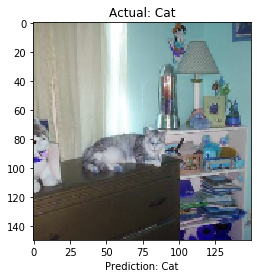

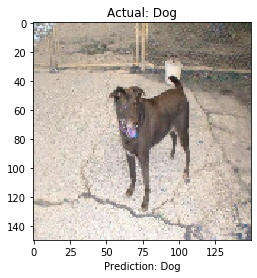

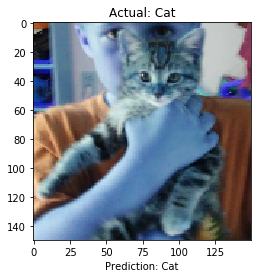

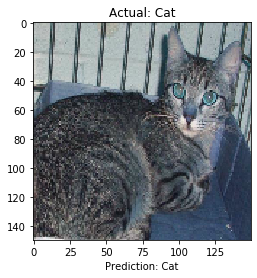

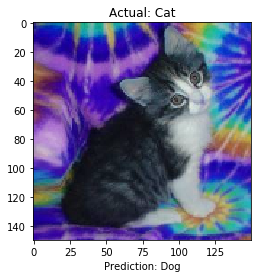

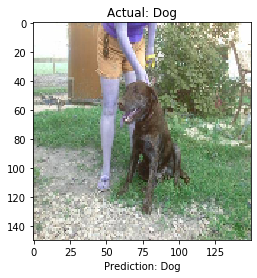

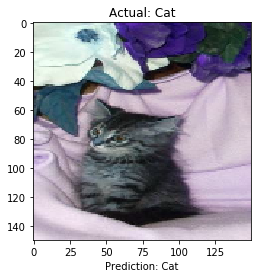

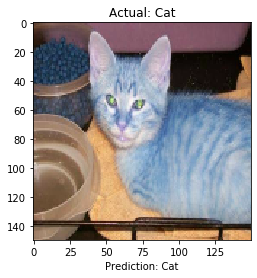

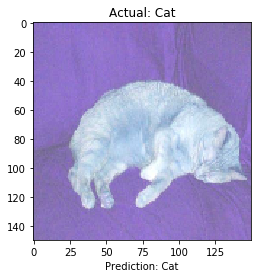

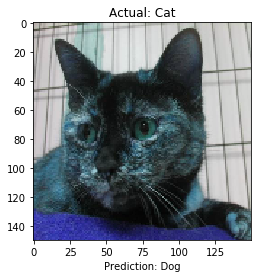

In [48]:
class_names = ['Cat', 'Dog']
test_images = np.array(X_test)
test_labels = np.array(Y_test)
#
size = len(prediction_probabilities)
temp = []
for i in range(size):
    if(prediction_probabilities[i]>0.5):
      temp.append(0)
    else:
      temp.append(1)
#
class_array = np.array(temp)
checknum = 1944
for i in range(10):
    #print(prediction_probabilities[i+checknum])
    #print(np.round(prediction_probabilities[i]))
    plt.grid(False)
    plt.imshow(test_images[i+checknum], cmap="gray")
    plt.title("Actual: " + class_names[Y_test[i+checknum]])
    plt.xlabel("Prediction: " + class_names[class_array[i+checknum]])
    plt.show()

